In [ ]:
import numpy as np
import sklearn as sk
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Upload 'new_train.csv' and 'new_test.csv' files into the Colab environment.

0. Download 'new_train.csv' and 'new_test.csv' from HISNet to your computer.
1. Run the code in the next cell.
2. Click "Select File(파일 선택)" button.
3. Select the two file(s) to upload.

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving new_test.csv to new_test.csv
Saving new_train.csv to new_train.csv
User uploaded file "new_test.csv" with length 266935 bytes
User uploaded file "new_train.csv" with length 799955 bytes


### The following code displays the first few lines of the uploaded files.

In [ ]:
print("ls")
!ls
print("The content of 'new_train.csv':")
!head 'new_train.csv'
print("The content of 'new_test.csv':")
!head 'new_test.csv'

ls
new_test.csv  new_train.csv  sample_data
The content of 'new_train.csv':
feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,target
112.24,54.19,30,14.936,128.3,33.83333333,65.69,47.2,133.8
153,54.4,38,18.2,190.1,37.63333333,65.53,46.3,160.2
14.4,53.69,34,16.509,17.4,11.1,65.44,11.7,171.4
30.02,53.64,28,31.917,33.7,17.16666667,65.43,22.6,146.8
29.08,53.57,40,19.25,32.6,20.8,65.43,26.2,131
27.74,53.63,58,33.438,23.6,22.36666667,65.42,23.9,148
58.14,53.61,50,26.768,68,61.36666667,65.42,63.3,164.8
16.24,54.83,82,17.083,16.8,12.5,65.41,15.8,97
95.78,53.61,68,21.782,117.5,104.4666667,65.41,105.6,116.8
The content of 'new_test.csv':
feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,target
77.7,57.37,54,66.085,66.1,51.23333333,57.95,60.6,689.4
30.2,54.26,86,35.99,31,26.96666667,61.7,27.7,353
71.78,53.78,54,57.934,50.7,49.46666667,62.19,49.5,541
1.34,53.82,56,61.359,1.5,1.633333333,61.64,1.1,660
24.82,56.33,38,29.375,24.4,28.33333333,60.33,23.7,163.4
20.36,56.51,74,16.635,21.3,22.1,60.44,20.4,134

# Problem 1: Load and observe data

1. Load the two csv files.
2. Display their count, mean, std, and the five-number summary (min, 25%, 50%, 75%, max).
3. Draw histogram of each column.


              feat1         feat2  ...         feat8        target
count  15000.000000  15000.000000  ...  15000.000000  15000.000000
mean      53.462547     55.258635  ...     50.541040    405.465010
std       44.881288      1.972927  ...     39.277951    226.712936
min        0.040000     52.540000  ...      0.200000     29.998000
25%       29.220000     53.890000  ...     28.100000    237.600000
50%       42.620000     54.140000  ...     41.000000    352.000000
75%       63.580000     57.320000  ...     60.700000    509.800000
max      758.740000     61.860000  ...    608.200000   1000.002000

[8 rows x 9 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ef2ba9e10>,
      dtype=object)

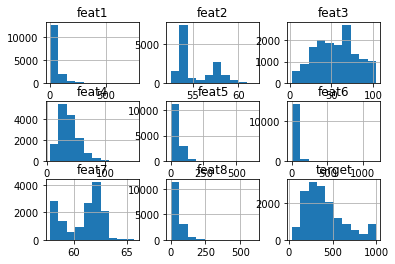

In [ ]:
# training data




             feat1        feat2  ...        feat8       target
count  5000.000000  5000.000000  ...  5000.000000  5000.000000
mean     50.576484    56.731094  ...    48.187060   440.266704
std      39.105578     2.224819  ...    34.590825   241.995054
min       0.120000    52.560000  ...     0.100000    29.998000
25%      28.620000    54.120000  ...    27.700000   247.550000
50%      42.080000    57.690000  ...    40.450000   386.400000
75%      61.120000    58.000000  ...    59.100000   578.850000
max     609.000000    61.950000  ...   493.000000  1000.002000

[8 rows x 9 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ef2798b38>,
      dtype=object)

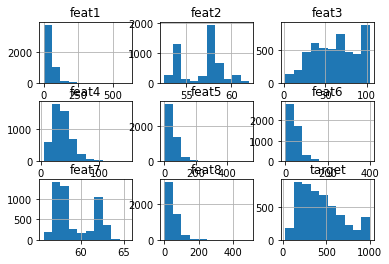

In [ ]:
# test data




# Problem 2: Prepare data
1. Convert the training and test data into numpy array.
2. Normalize the data by standardization and minmax normalization.

In [ ]:
feature_columns = ['feat1', 'feat2', 'feat3', 'feat4', 'feat5', 'feat6', 'feat7', 'feat8']
target_column = 'target'

### Convert the training and test data into numpy array.

In [ ]:
# convert data into numpy array



In [ ]:
print("X_train.shape = ", X_train.shape, " y_train.shape = ", y_train.shape)
print("X_test.shape = ", X_test.shape, " y_test.shape = ", y_test.shape)

X_train.shape =  (15000, 8)  y_train.shape =  (15000,)
X_test.shape =  (15000, 8)  y_test.shape =  (15000,)


In [ ]:
print(X_train[:5])
print(X_test[:5])

    feat1  feat2  feat3   feat4  feat5      feat6  feat7  feat8
0  112.24  54.19     30  14.936  128.3  33.833333  65.69   47.2
1  153.00  54.40     38  18.200  190.1  37.633333  65.53   46.3
2   14.40  53.69     34  16.509   17.4  11.100000  65.44   11.7
3   30.02  53.64     28  31.917   33.7  17.166667  65.43   22.6
4   29.08  53.57     40  19.250   32.6  20.800000  65.43   26.2
    feat1  feat2  feat3   feat4  feat5      feat6  feat7  feat8
0  112.24  54.19     30  14.936  128.3  33.833333  65.69   47.2
1  153.00  54.40     38  18.200  190.1  37.633333  65.53   46.3
2   14.40  53.69     34  16.509   17.4  11.100000  65.44   11.7
3   30.02  53.64     28  31.917   33.7  17.166667  65.43   22.6
4   29.08  53.57     40  19.250   32.6  20.800000  65.43   26.2


### Normalize data applying the following methods:
1. Standardization
2. Min-max normalization

In [ ]:
# Standardization




In [ ]:
print(X_train_standard[:5])
print(X_test_standard[:5])

In [ ]:
# min-max normalization




In [ ]:
print(X_train_minmax[:5])
print(X_test_minmax[:5])

# Problem 3: Build a machine learning model that predicts the target values from the features.
 * Do your best to achieve the highest performance on the test data using any methods or techniques learned from this course.
 * However, DO NOT use ensemble methods.
 * Referencing any code obtained from the Internet or other people will be regarded as cheating.